<a href="https://colab.research.google.com/github/longnguyendevone/Project1/blob/main/LongProject1_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Intro

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [25]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/MyDrive/From/data.csv", sep = ';')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## 1. Data Acquisition and Preparation

### Data Cleaning

In [26]:
data.shape

(4424, 37)

In [27]:
# Checking for Null Values
data.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


Không có giá trị NULL trong dataset.



In [28]:
# Checking for duplicate values
duplicate = data[data.duplicated()]
print("Duplicate Rows :")
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target


Không có dòng giá trị bị lặp lại trong dataset.

In [29]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [30]:
# Replacing whitesapce present in the column name
data.columns = [x.replace(' ', '_') for x in data.columns]

In [31]:
data.head()

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance\t,Previous_qualification,Previous_qualification_(grade),Nacionality,Mother's_qualification,Father's_qualification,...,Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## 2. Exploratory Data Analysis

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital_status                                  4424 non-null   int64  
 1   Application_mode                                4424 non-null   int64  
 2   Application_order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening_attendance	                     4424 non-null   int64  
 5   Previous_qualification                          4424 non-null   int64  
 6   Previous_qualification_(grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's_qualification                          4424 non-null   int64  
 9   Father's_qualification                   

7 cột có giá trị float, 29 cột có giá trị integer, 1 cột object.

In [33]:
data['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


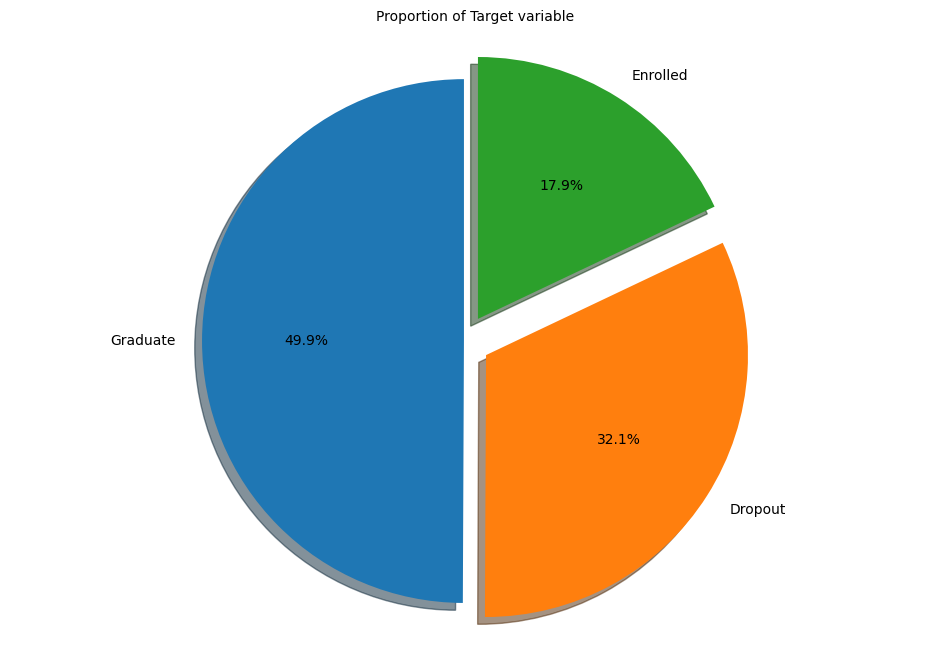

In [34]:
# Pie chart
labels = 'Graduate', 'Dropout', 'Enrolled'
sizes = [data.Target[data['Target']=='Graduate'].count(), data.Target[data['Target']=='Dropout'].count(), data.Target[data['Target']=='Enrolled'].count()]
explode = (0, 0.1, 0.1)
fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Target variable", size = 10)
plt.show()

#### Distribution of continous random variables



In [35]:
data_num = data.select_dtypes(include=['float64'])
data_num

,Previous_qualification_(grade),Admission_grade,Curricular_units_1st_sem_(grade),Curricular_units_2nd_sem_(grade),Unemployment_rate,Inflation_rate,GDP
0,122.0,127.3,0.000000,0.000000,10.8,1.4,1.74
1,160.0,142.5,14.000000,13.666667,13.9,-0.3,0.79
2,122.0,124.8,0.000000,0.000000,10.8,1.4,1.74
3,122.0,119.6,13.428571,12.400000,9.4,-0.8,-3.12
4,100.0,141.5,12.333333,13.000000,13.9,-0.3,0.79
...,...,...,...,...,...,...,...
4419,125.0,122.2,13.600000,12.666667,15.5,2.8,-4.06
4420,120.0,119.0,12.000000,11.000000,11.1,0.6,2.02
4421,154.0,149.5,14.912500,13.500000,13.9,-0.3,0.79
4422,180.0,153.8,13.800000,12.000000,9.4,-0.8,-3.12


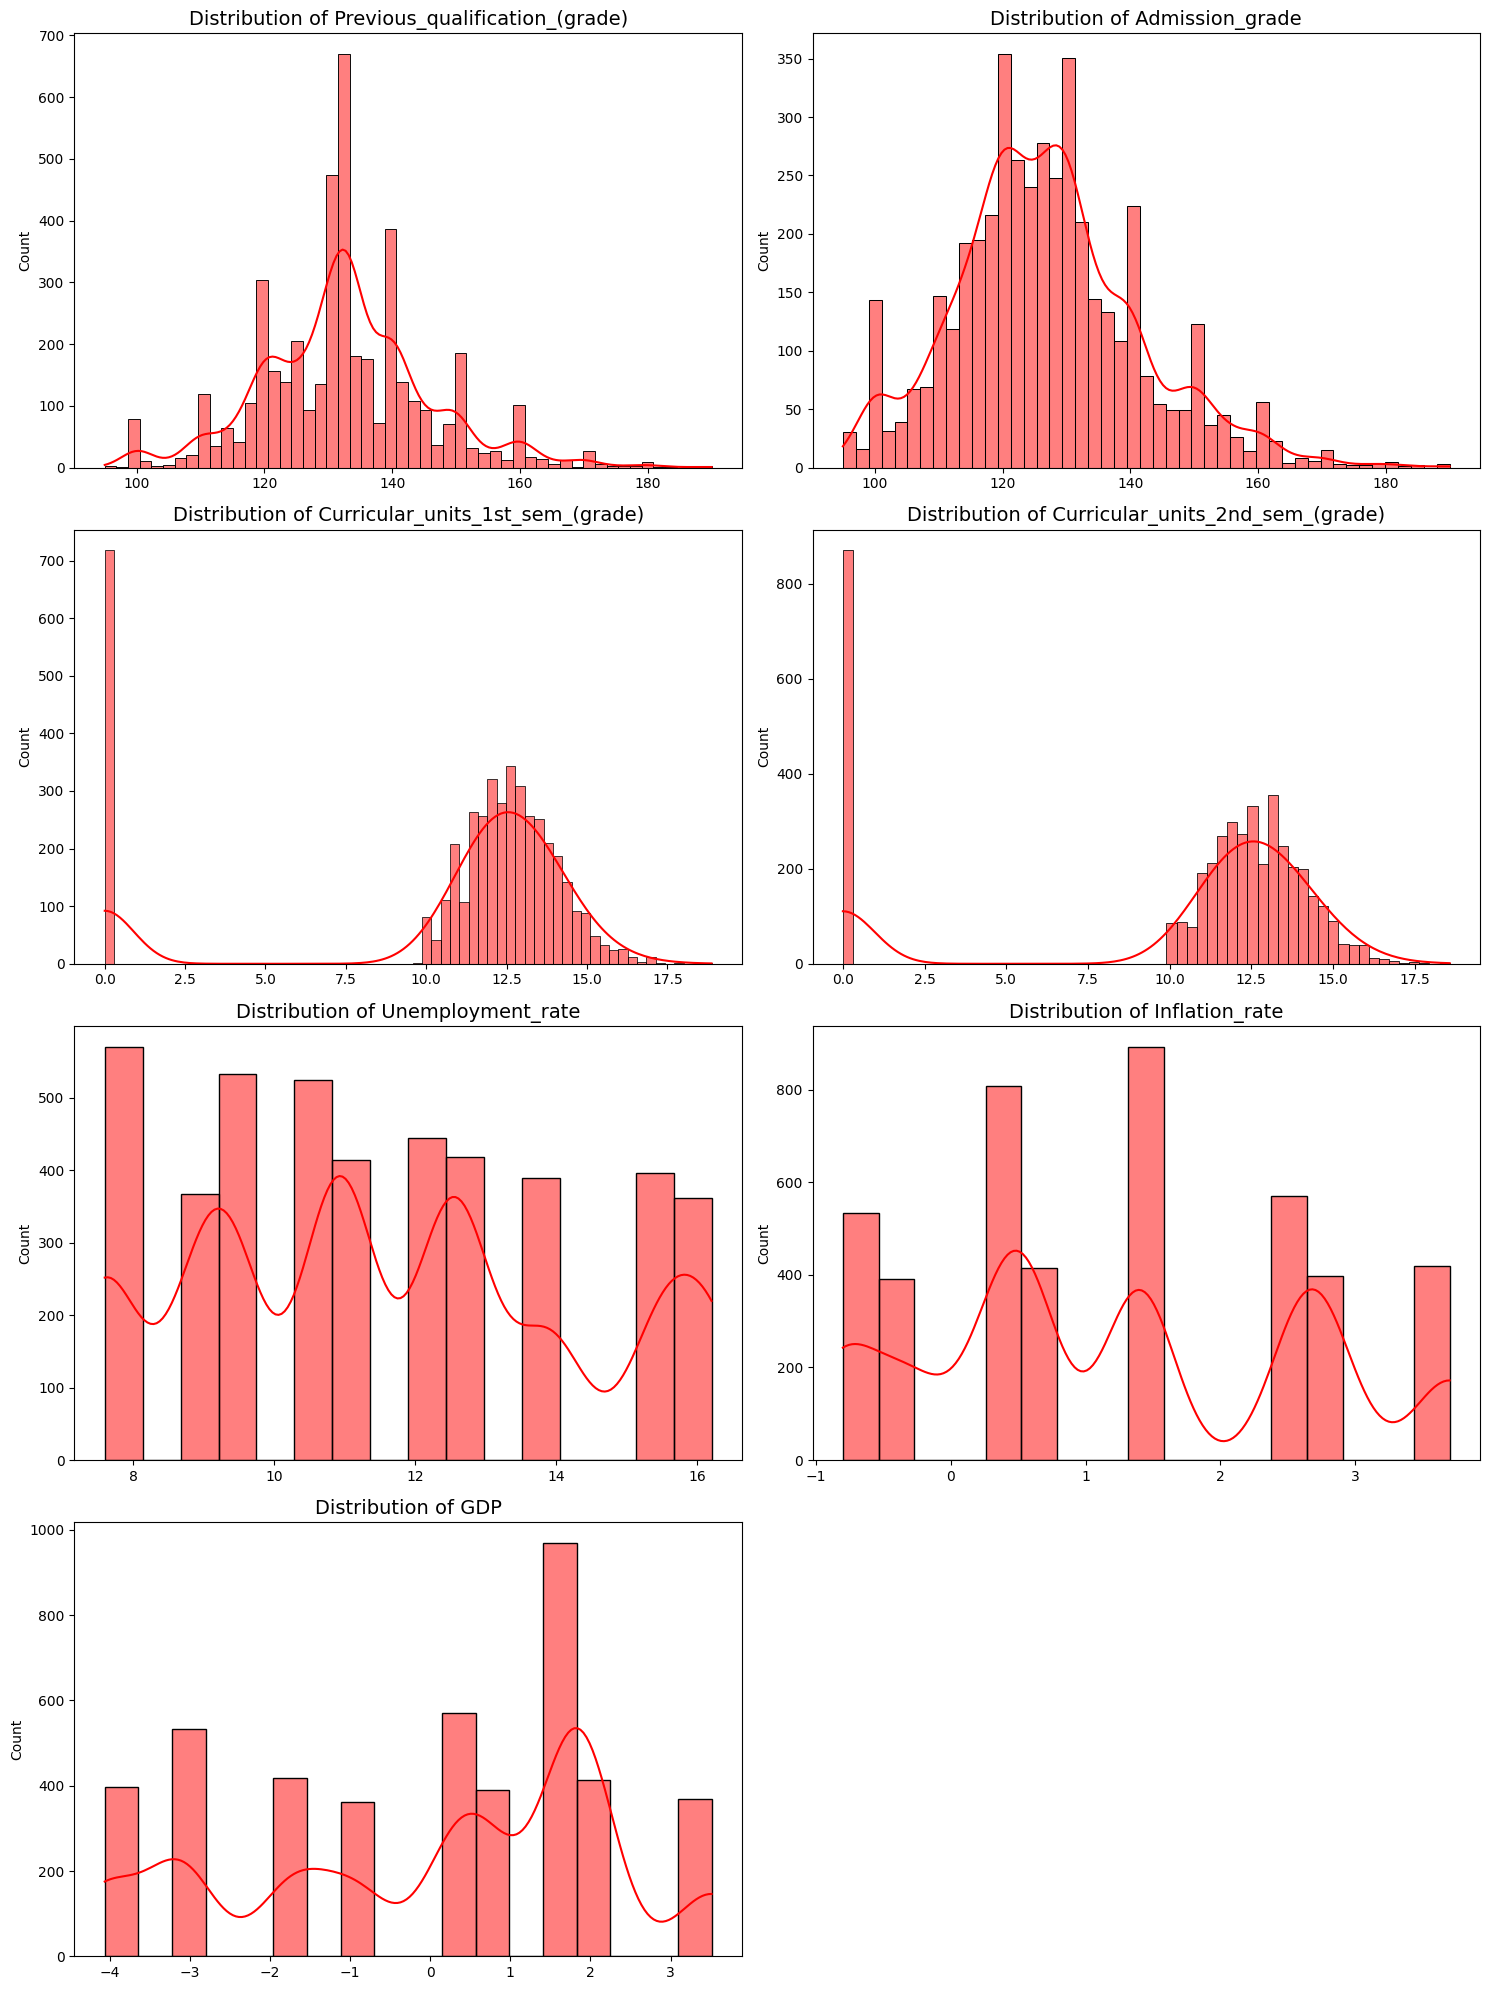

In [36]:
# Distribution Plot
import math

cols = data_num.columns
n_cols = 2
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten to 1D for easy indexing

for i, col_name in enumerate(cols):
    sns.histplot(data[col_name], kde=True, ax=axes[i], color='red')
    axes[i].set_title(f'Distribution of {col_name}', fontsize=14)
    axes[i].set_xlabel('')

# Remove any empty subplots if the number of plots is odd
for i in range(len(cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

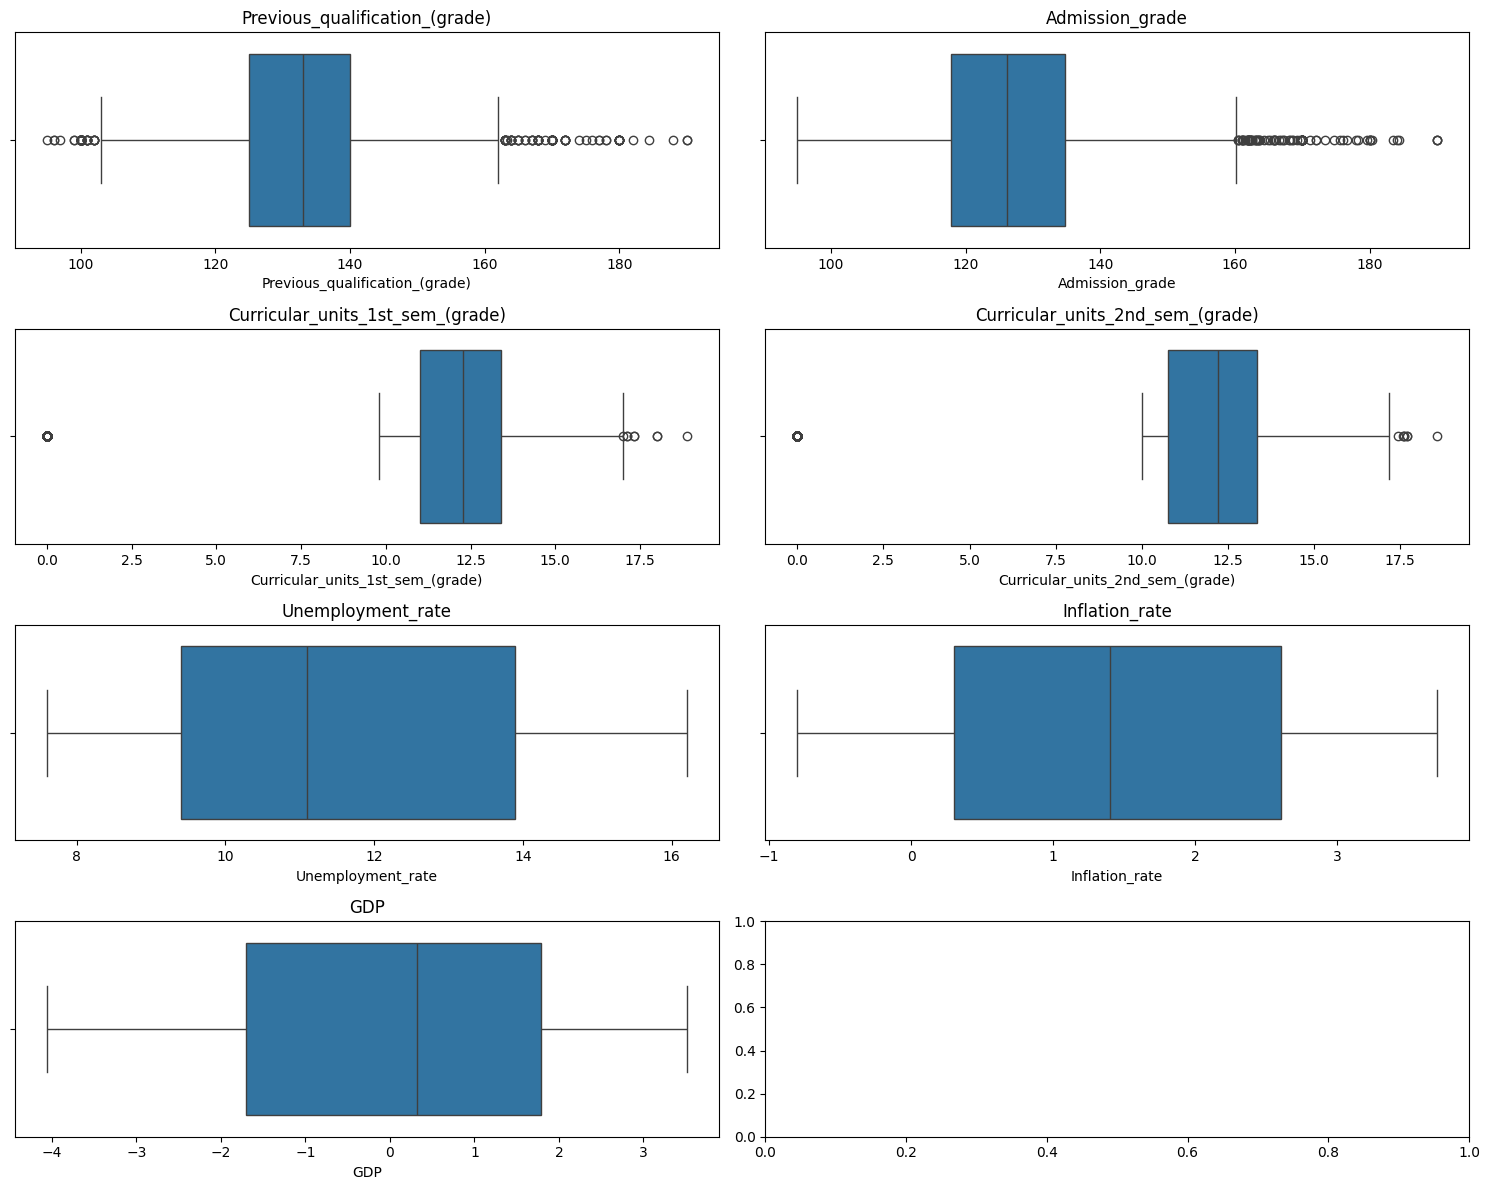

In [37]:
#2 columns of plots
cols = data_num.columns
n_rows = (len(cols) + 1) // 2
fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 3))
axes = axes.flatten()
for i, col_name in enumerate(cols):
    sns.boxplot(x=data[col_name], ax=axes[i])
    axes[i].set_title(col_name)

plt.tight_layout()
plt.show()

*Ngoại trừ Unemployment rate, Inflation rate, và GDP thì mọi feature khác có chứa dữ liệu ngoại lai.*

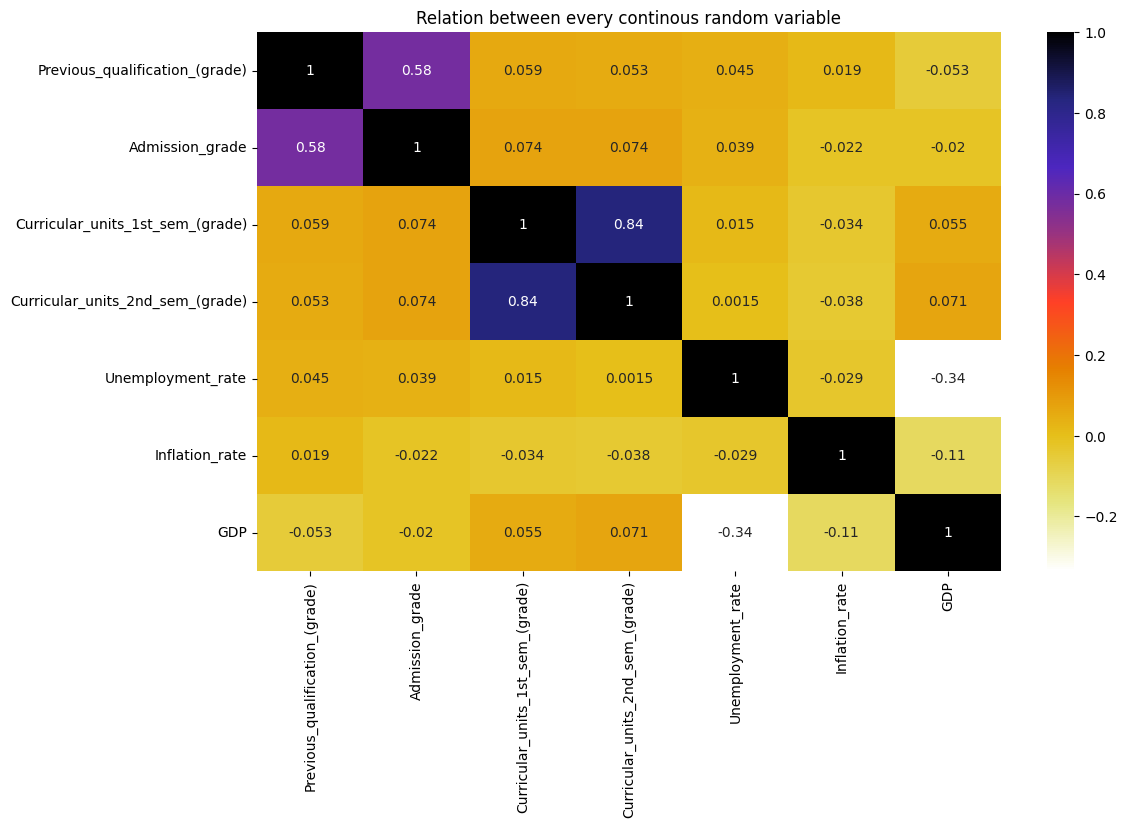

In [38]:
# Displaying Correlation between numerical varaibles using heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
cor = data_num.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('Relation between every continous random variable')
plt.show()

*Từ biểu đồ trên, chúng ta có thể quan sát thấy rằng Curricular_units_1st_sem_(grade) và Curricular_units_2nd_sem_(grade) có mối tương quan mạnh mẽ với nhau. Trong khi đó, Previous_qualification_(grade) và Admission_grade có mối quan hệ ở mức trung bình. Ngược lại, các chỉ số GDP, tỷ lệ lạm phát (inflation rate) và tỷ lệ thất nghiệp (unemployment rate) lại có mối quan hệ nghịch biến (tương quan âm) với nhau.*





#### Visualization of discrete random variables

In [39]:
# Get the list of continous random variables
num_data = [cname for cname in data.columns if data[cname].dtypes in ['float64']]
num_data

['Previous_qualification_(grade)',
 'Admission_grade',
 'Curricular_units_1st_sem_(grade)',
 'Curricular_units_2nd_sem_(grade)',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP']

In [40]:
# Get the list of discrete random variables
cat_cols = data._get_numeric_data().columns
cat_cols

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime/evening_attendance\t', 'Previous_qualification',
       'Previous_qualification_(grade)', 'Nacionality',
       'Mother's_qualification', 'Father's_qualification',
       'Mother's_occupation', 'Father's_occupation', 'Admission_grade',
       'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_(credited)',
       'Curricular_units_1st_sem_(enrolled)',
       'Curricular_units_1st_sem_(evaluations)',
       'Curricular_units_1st_sem_(approved)',
       'Curricular_units_1st_sem_(grade)',
       'Curricular_units_1st_sem_(without_evaluations)',
       'Curricular_units_2nd_sem_(credited)',
       'Curricular_units_2nd_sem_(enrolled)',
       'Curricular_units_2nd_sem_(evaluations)',
       'Curricular_units_2nd_sem_(approved)',
       'Curricular_units_2nd

In [41]:
# Separate discrete and continous random variables
cols = list(set(cat_cols) - set(num_data))
cols

['Marital_status',
 'Previous_qualification',
 "Mother's_occupation",
 'Scholarship_holder',
 'Curricular_units_2nd_sem_(without_evaluations)',
 'Debtor',
 'Gender',
 'Age_at_enrollment',
 'Course',
 'Curricular_units_2nd_sem_(credited)',
 'Curricular_units_1st_sem_(without_evaluations)',
 'Daytime/evening_attendance\t',
 'Curricular_units_1st_sem_(enrolled)',
 'Application_mode',
 'Curricular_units_1st_sem_(approved)',
 'Educational_special_needs',
 "Mother's_qualification",
 'Displaced',
 'Curricular_units_2nd_sem_(evaluations)',
 'Application_order',
 "Father's_occupation",
 'Curricular_units_1st_sem_(credited)',
 'Tuition_fees_up_to_date',
 'Curricular_units_1st_sem_(evaluations)',
 'International',
 'Curricular_units_2nd_sem_(enrolled)',
 'Curricular_units_2nd_sem_(approved)',
 "Father's_qualification",
 'Nacionality']

In [42]:
len(cols)

29

In [43]:
data[cols].head()

,Marital_status,Previous_qualification,Mother's_occupation,Scholarship_holder,Curricular_units_2nd_sem_(without_evaluations),Debtor,Gender,Age_at_enrollment,Course,Curricular_units_2nd_sem_(credited),...,Application_order,Father's_occupation,Curricular_units_1st_sem_(credited),Tuition_fees_up_to_date,Curricular_units_1st_sem_(evaluations),International,Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(approved),Father's_qualification,Nacionality
0,1,1,5,0,0,0,1,20,171,0,...,5,9,0,1,0,0,0,0,12,1
1,1,1,3,0,0,0,1,19,9254,0,...,1,3,0,0,6,0,6,6,3,1
2,1,1,9,0,0,0,1,19,9070,0,...,5,9,0,0,0,0,6,0,37,1
3,1,1,5,0,0,0,0,20,9773,0,...,2,3,0,1,8,0,6,5,37,1
4,2,1,9,0,0,0,0,45,8014,0,...,1,9,0,1,9,0,6,6,38,1


## Visualization of Categorical Data

### Univeriate and Bi-variate Analysis

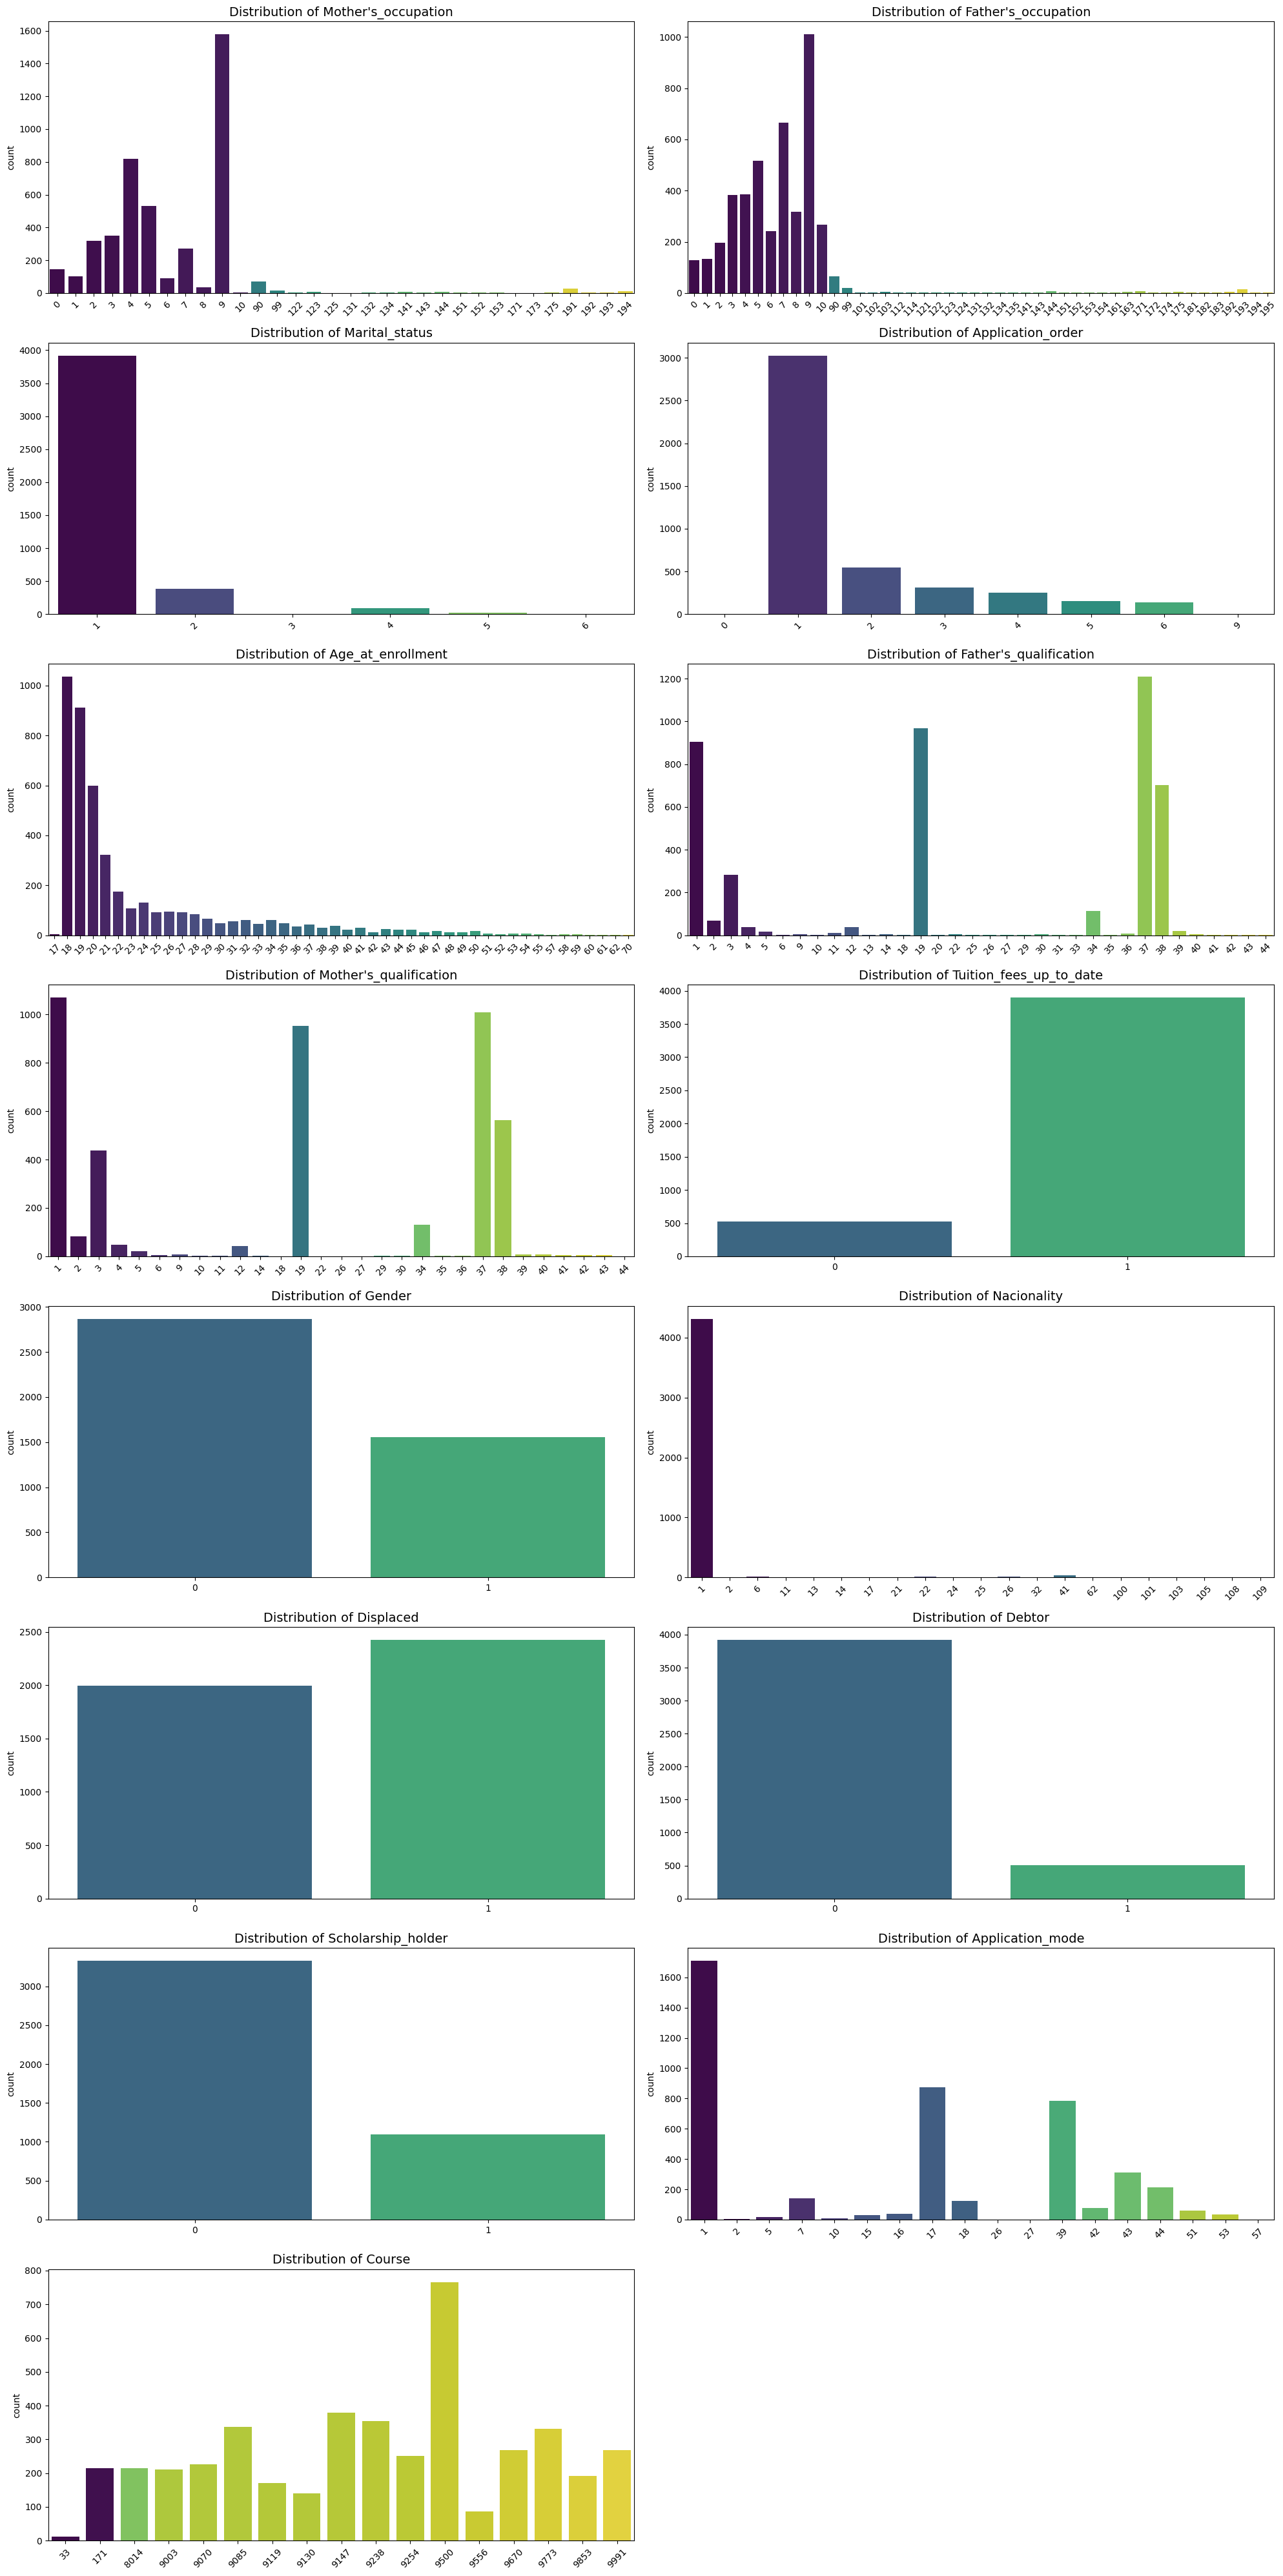

In [44]:
import math

cols_ = ["Mother's_occupation", "Father's_occupation", 'Marital_status',
         'Application_order', 'Age_at_enrollment', "Father's_qualification",
         "Mother's_qualification", 'Tuition_fees_up_to_date', 'Gender',
         "Nacionality", 'Displaced', 'Debtor', "Scholarship_holder",
         'Application_mode', 'Course']

# Define grid dimensions (2 columns)
n_cols = 2
n_rows = math.ceil(len(cols_) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten() # Flatten to 1D for easy indexing

for ind, col in enumerate(cols_):
    # 1. Use hue=col and a palette for the gradient effect
    # 2. palette="viridis" is colorblind-friendly and provides a nice gradient
    sns.countplot(x=col, data=data, ax=axes[ind], hue=col, palette="viridis", legend=False)

    axes[ind].set_title(f'Distribution of {col}', fontsize=14)
    axes[ind].set_xlabel('') # Optional: clear label if title is sufficient

    # Rotate x-labels if there are many categories to prevent overlap
    if data[col].nunique() > 5:
        axes[ind].tick_params(axis='x', rotation=45)

# Remove any empty subplots if the number of plots is odd
for i in range(len(cols_), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Insights

1. Most mothers are actually unskilled workers, followed by administrative staff, safety workers and sellers.
2. Most student's fathers are unskilled workers, followed by skilled workers in industry, safety workers, security staffs and sellers.
3. More than 90% of students from the given dataset are single.
4. Most students are enrolled at the age of 18, 19, and 20.
5. Most parents have a very basic level of education starting from class 5th to 12th.
6. More than 90% students submit their tution fees on time.
7. In this group of students, more than 60% are females.
8. Almost every student in this group belongs to Portuguese.
9. Most students in this group are not scholarship recipients
10. Most students in the group are followed the 1st phase of application mode followed by 2nd phase.
11. Most students enrolled themselves for the Nursing course followed by management, social service, journalism and communication course.

## Revelations

1. Socio-Economic Background
Parental Occupation: The analysis confirms that the majority of students come from working-class backgrounds.

Mothers: The largest group consists of unskilled workers, followed by administrative staff and service/sales workers.

Fathers: Similarly, the dominant category is unskilled workers, but with a higher representation in skilled industrial roles and security/safety services compared to mothers.

Parental Education: There is a strong correlation between occupation and education level. The data shows that the maximum number of parents have a basic education level (typically ranging from the 5th to the 12th year of schooling), rather than higher education degrees. This "first-generation" student status is often a key predictor for academic support needs.

2. Student Demographics
The student body is young, local, and predominantly female.

Gender: The cohort is not balanced; over 60% of students are female. This gender imbalance could introduce bias in your model if not accounted for.

Marital Status: The vast majority (>90%) are single, which aligns with the typical age of enrollment.

Age: Enrollment peaks at 18, 19, and 20 years old, indicating that most students enter directly after secondary school rather than as mature students.

Nationality: The dataset is highly homogeneous, with almost every student being Portuguese. This suggests the model may generalize well for local universities but poorly for international cohorts.

3. Academic & Financial Profile
Financial Standing: Despite the lower socio-economic background of many parents, financial compliance is high. More than 90% of students keep their tuition fees up to date, indicating strong commitment or family prioritization of education.

Scholarships: Interestingly, the majority are NOT scholarship holders. Combined with the "unskilled" parental background, this suggests a significant financial burden on these families.

Course Preferences: Nursing is the most popular course, followed by Management, Social Service, and Journalism. This skew towards Nursing (a high-demand, practical degree) often correlates with higher retention rates compared to theoretical courses.

Application Mode: Most students enter via the 1st Phase (general contingent), which implies they are entering with their standard secondary school grades rather than special exams or transfers.

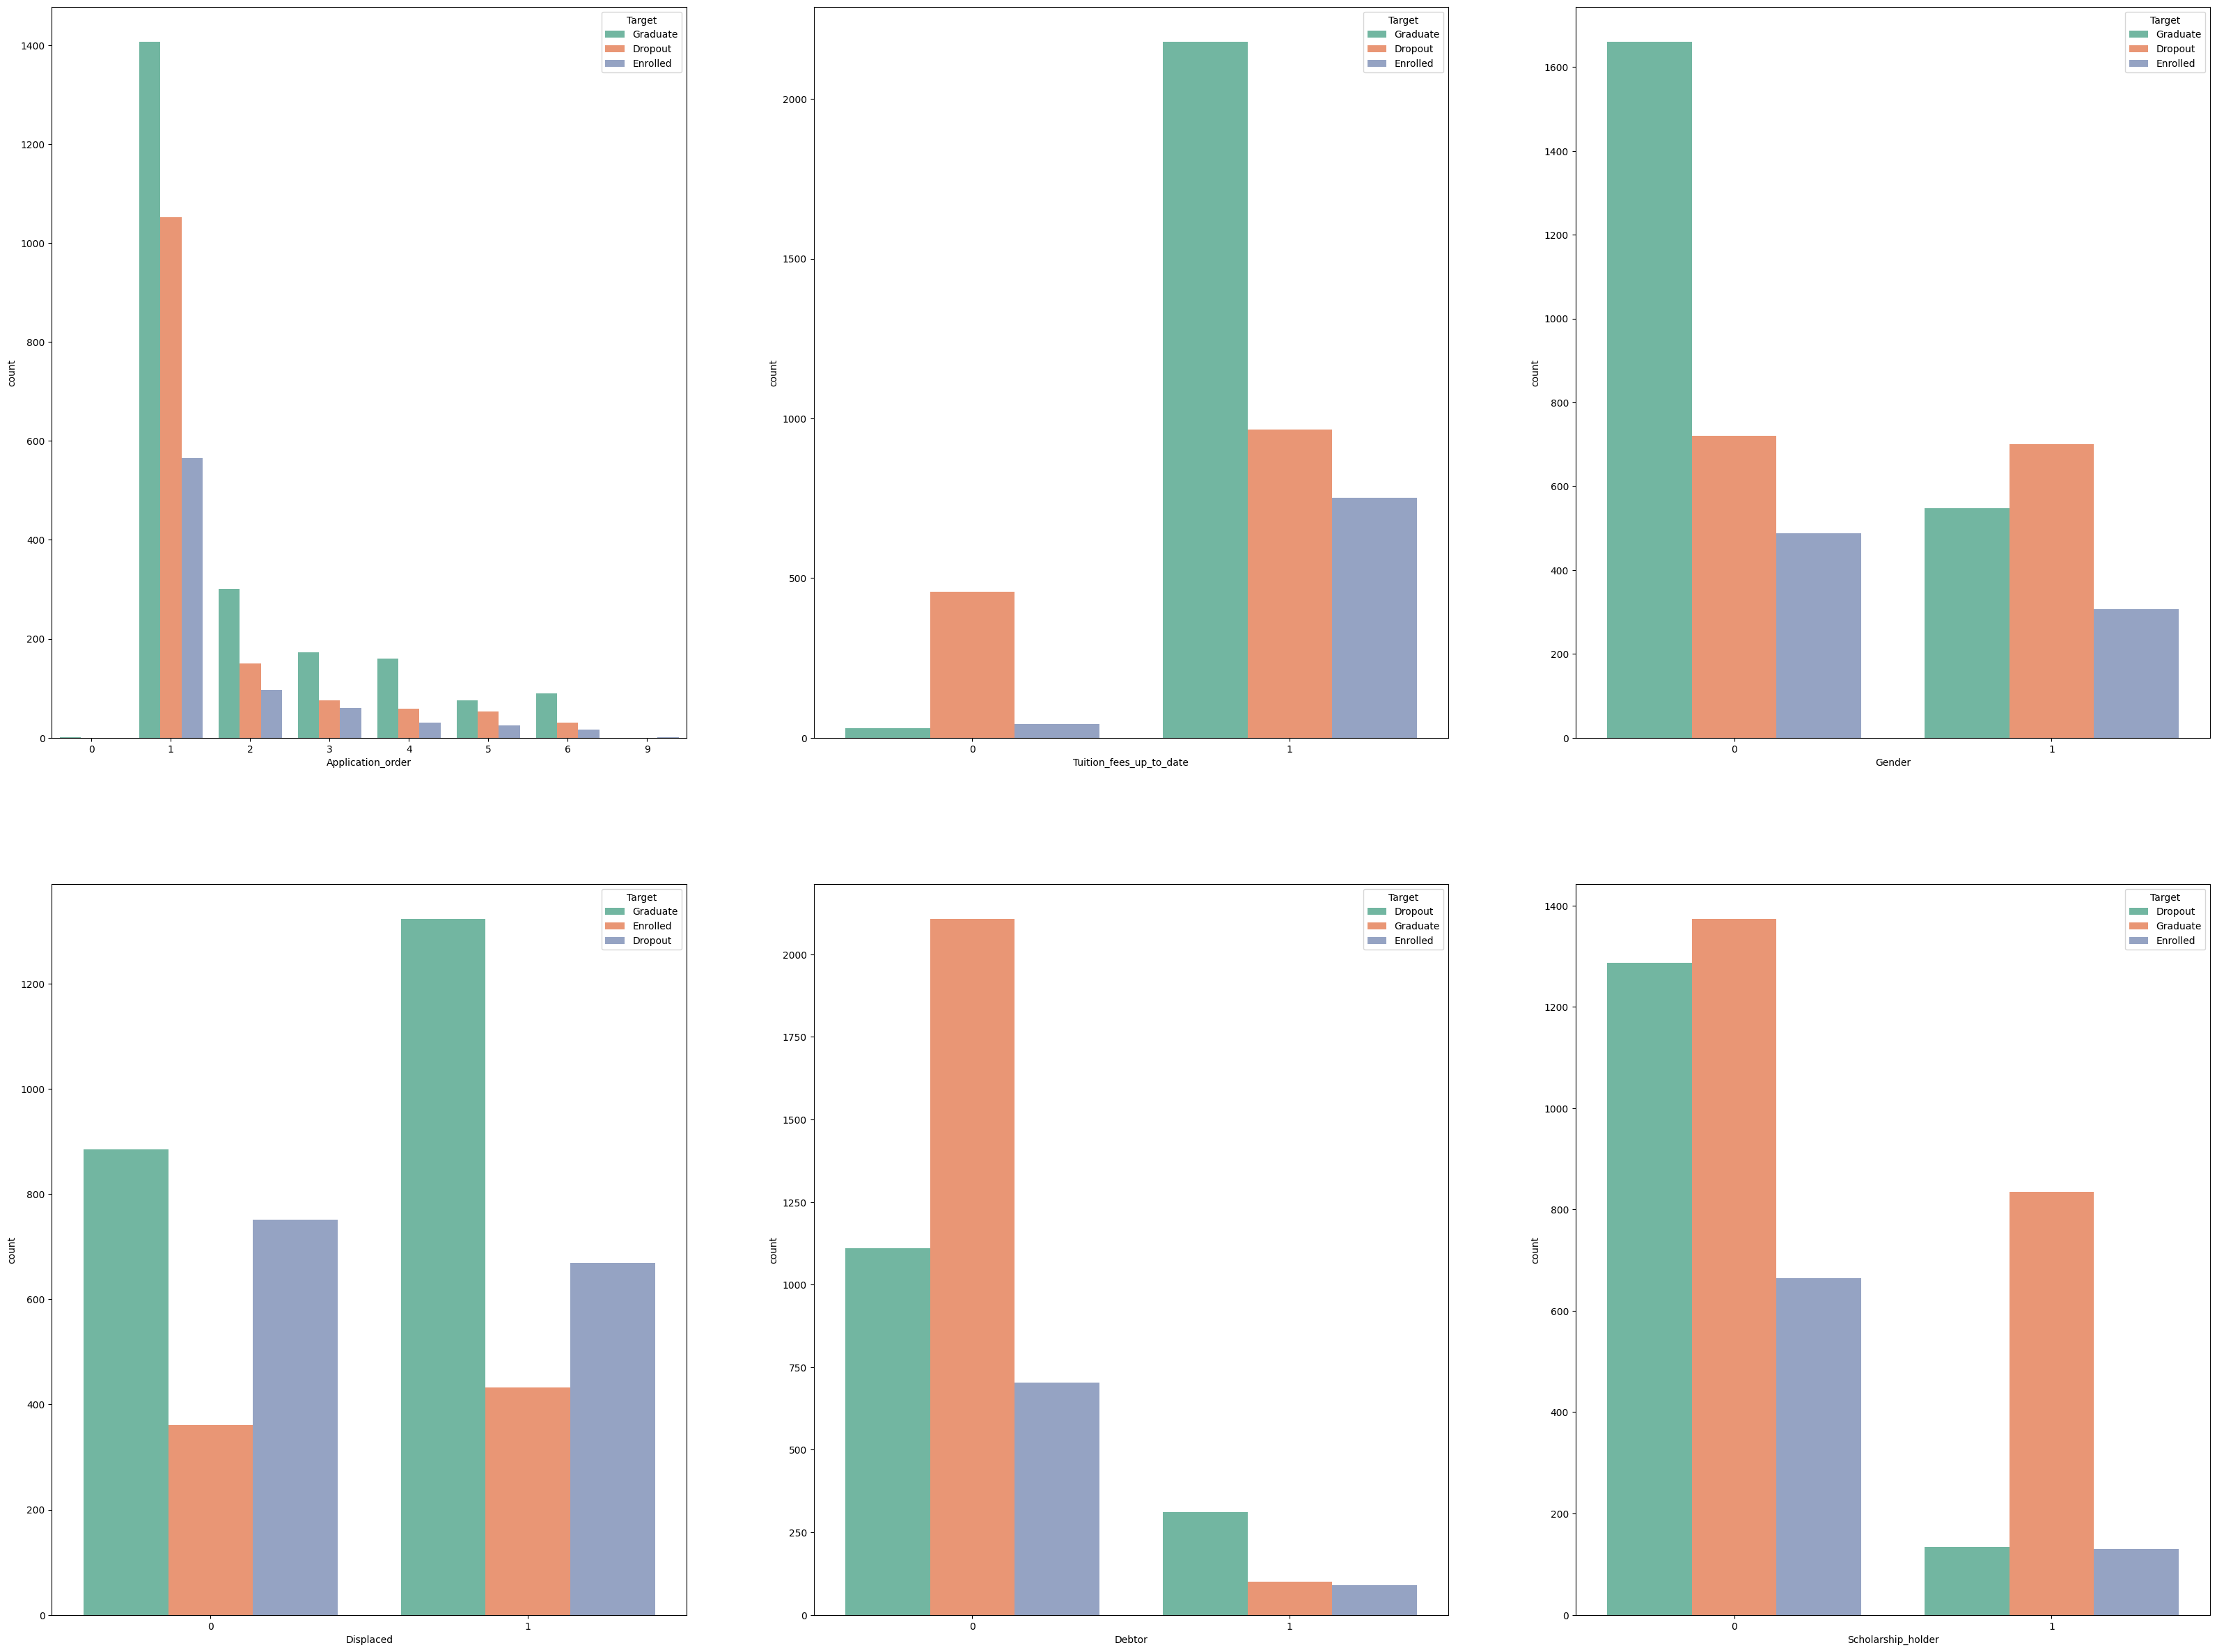

In [45]:
# Impact on target variable.

fig, ax = plt.subplots(2, 3, figsize=(40, 30))

sns.countplot(x='Application_order', hue='Target', data=data, palette='Set2', ax=ax[0][0])
sns.countplot(x='Tuition_fees_up_to_date', hue='Target', data=data, palette='Set2', ax=ax[0][1])
sns.countplot(x='Gender', hue='Target', data=data, palette='Set2', ax=ax[0][2])
sns.countplot(x='Displaced', hue='Target', data=data, palette='Set2', ax=ax[1][0])
sns.countplot(x='Debtor', hue='Target', data=data, palette='Set2', ax=ax[1][1])
sns.countplot(x='Scholarship_holder', hue='Target', data=data, palette='Set2', ax=ax[1][2])


plt.show()

## Insights

1. We can observe here that those students who has not submitted the tution fees on time, they are having a higher chance of dropout.
2. More males are droping out than females.
3. The students who are in debt, they are having a higher chance of droping out.

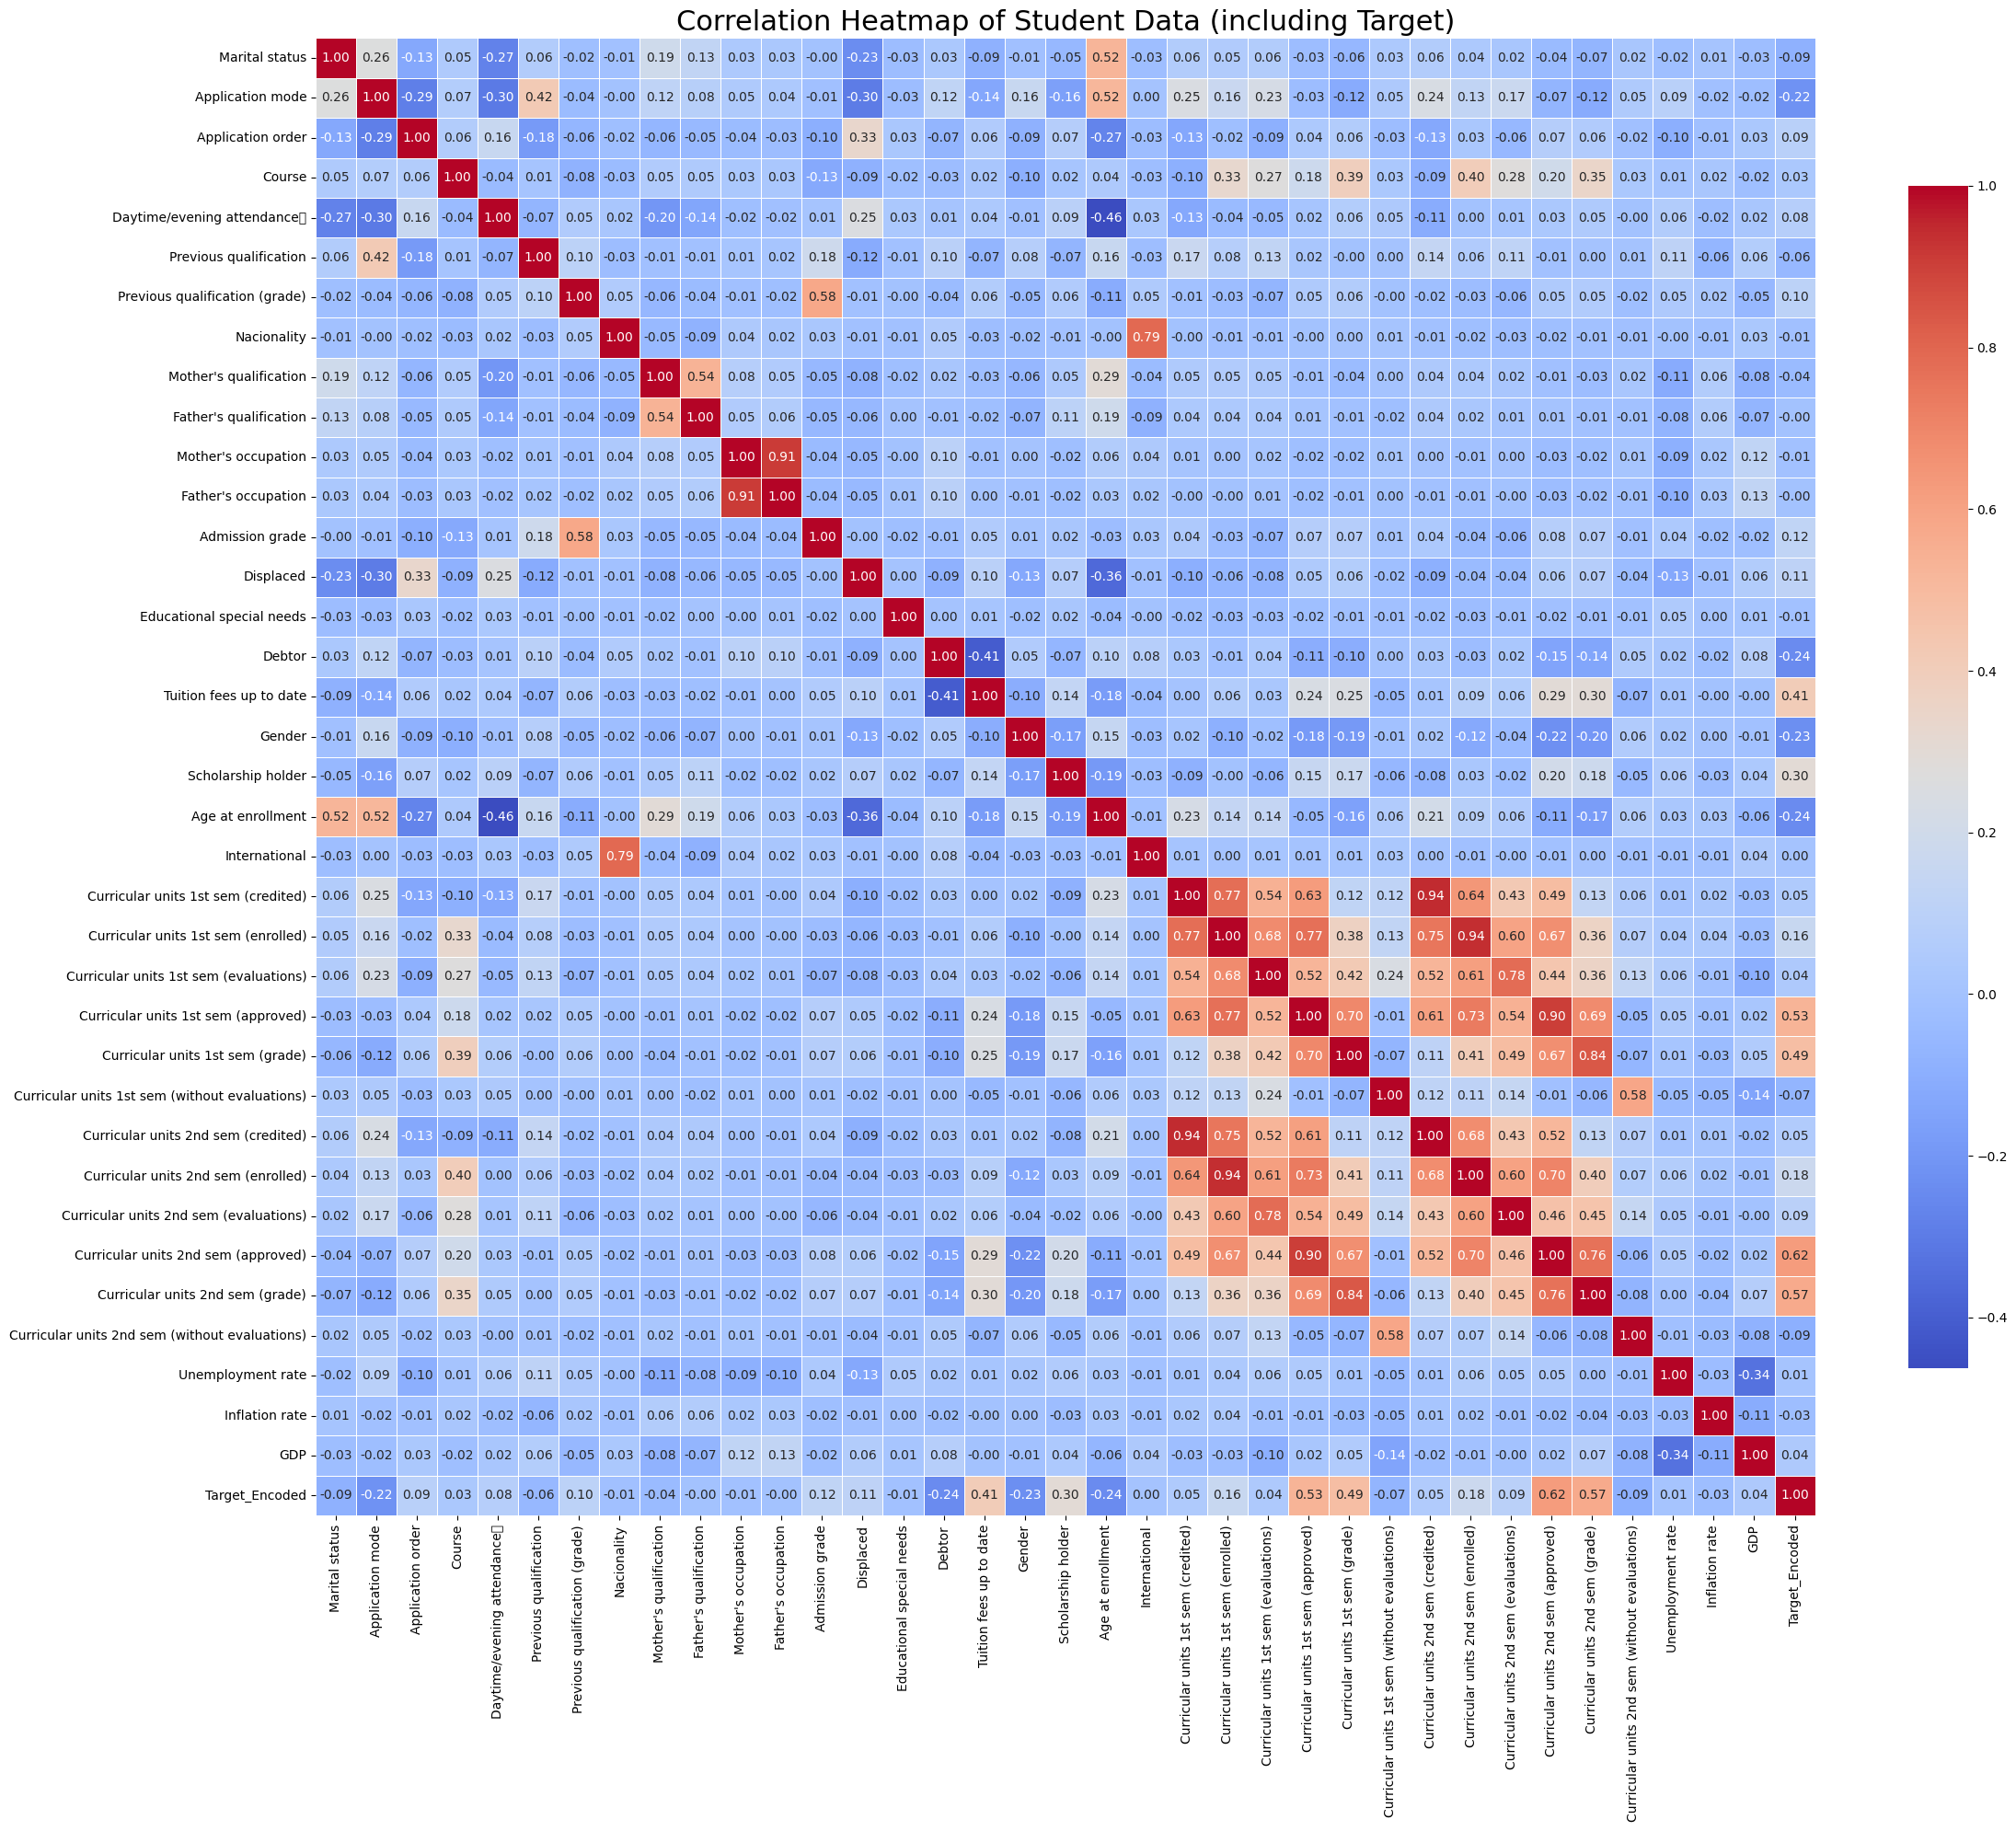

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset
# Ensure the file 'data.csv' is in the same folder as your notebook
df = pd.read_csv('/content/drive/MyDrive/From/data.csv', sep=';')

# 2. Preprocess 'Target' for Correlation
# We map categorical values to numbers to include them in the heatmap:
# Dropout = 0 (Negative outcome)
# Enrolled = 1 (Neutral/Ongoing)
# Graduate = 2 (Positive outcome)
if 'Target' in df.columns:
    df['Target_Encoded'] = df['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})

    # Create a correlation matrix including the new encoded target
    # We drop the original 'Target' string column for the calculation
    corr_matrix = df.drop(columns=['Target']).corr()
else:
    corr_matrix = df.corr()

# 3. Create the Heatmap
plt.figure(figsize=(24, 20))

# 'coolwarm' is a good diverging palette: Blue (negative corr) <-> Red (positive corr)
sns.heatmap(
    corr_matrix,
    annot=True,       # Show the actual numbers on the boxes
    fmt=".2f",        # Format to 2 decimal places
    cmap='coolwarm',  # Color scheme
    linewidths=0.5,   # Space between boxes
    cbar_kws={"shrink": 0.8} # Adjust color bar size
)

plt.title('Correlation Heatmap of Student Data (including Target)', fontsize=22)
plt.tight_layout()
plt.show()

1. The "Hot Zones" of Success (Strong Positive Correlations)
The variables with the highest positive correlation to the target (moving from Dropout $\rightarrow$ Enrolled $\rightarrow$ Graduate) are the most significant predictors of success.

*   Approved Units (1st & 2nd Semesters): With correlation coefficients between 0.53 and 0.62, these are the strongest indicators. Passing your classes in the first year is the single best predictor of finishing your degree. The correlation is higher for the 2nd semester (0.62) than the 1st (0.53), suggesting that 2nd-semester performance is a slightly more definitive signal of long-term commitment.
*   Academic Grades: Grades in both semesters show high positive correlation (0.49 to 0.57). High marks naturally align with graduation, but "approving" (passing) the units is actually a stronger predictor than the specific grade received.
*   Tuition Fees Up to Date (0.41): Staying out of debt with the university is a major "green flag." Students who pay on time are significantly more likely to graduate.
2. The "Cold Zones" of Risk (Negative Correlations) Negative correlations (blue or darker colors in most heatmaps) show which factors "pull" a student toward dropping out.
* Age at Enrollment (-0.24): As the age of a student increases, the probability of graduation decreases. This often reflects the "non-traditional student" challenge, where older students may have to balance work and family, making them more vulnerable to dropping out.
* Debtor Status (-0.24): Being a debtor has a clear negative impact. It is often the flip side of the "Tuition Fees" metric—financial stress is a primary driver of academic failure.
* Gender (-0.23): In this dataset, there is a notable correlation suggesting that Male students (coded as 1) are more likely to drop out compared to Female students (coded as 0).
3. Redundant or Grouped Variables (Inter-variable Correlations) The heatmap also reveals which variables are nearly identical, which is useful for simplifying the data.
* 1st sem vs. 2nd sem (0.94): The number of units a student enrolls in for the first semester is almost always the same as the second.
* Parents' Background (0.91): There is a very high correlation between Mother’s and Father’s occupations. This suggests that social class is a "household" trait rather than an individual parent trait. If one parent is in a high-skill role, the other likely is too.
* Nationality & International Status (0.79): These are largely redundant; international students are almost the only ones with a non-local nationality.
4. Low Correlation Variables (The "Noise")
* Variables like Inflation Rate, Unemployment Rate, and GDP have very low correlations (near 0.0) with individual student success. Insight: While the macro-economy matters for society, a student's personal academic performance and financial stability (scholarships/fees) are far more influential on whether they personally graduate than the national unemployment rate.